
# Mathtext Examples

Selected features of Matplotlib's math rendering engine.


0 $W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$
1 $\alpha_i > \beta_i,\ \alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ \ldots$
2 $\frac{3}{4},\ \binom{3}{4},\ \genfrac{}{}{0}{}{3}{4},\ \left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$
3 $\sqrt{2},\ \sqrt[3]{x},\ \ldots$
4 $\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ \mathrm{or}\ \mathcal{CALLIGRAPHY}\ \mathrm{\AA}$
5 $\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ \hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ \ldots$
6 $\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ \Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ \aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$
7 $\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ \log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varprop

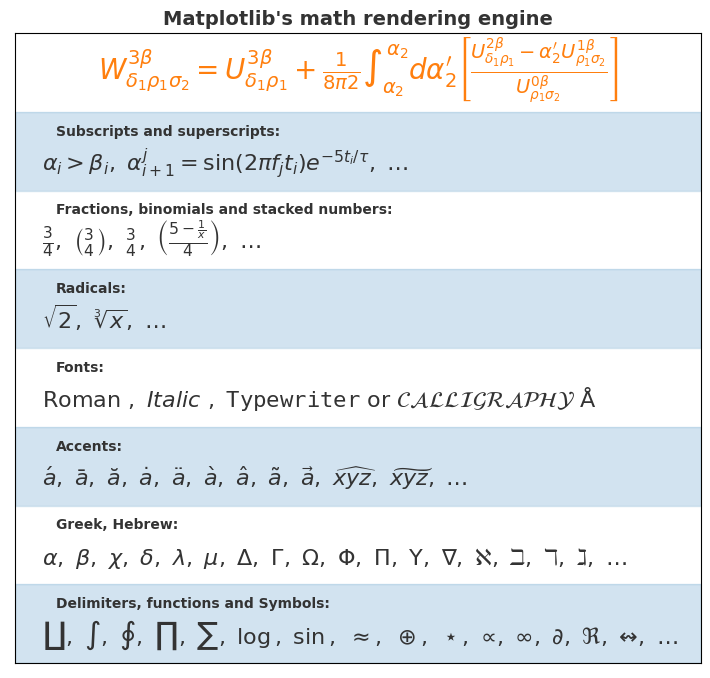

In [3]:
import re
import subprocess
import sys

import matplotlib.pyplot as plt


# Selection of features following "Writing mathematical expressions" tutorial,
# with randomly picked examples.
mathtext_demos = {
    "Header demo":
        r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
        r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} "
        r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ "
        r"U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_"
        r"{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$",

    "Subscripts and superscripts":
        r"$\alpha_i > \beta_i,\ "
        r"\alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ "
        r"\ldots$",

    "Fractions, binomials and stacked numbers":
        r"$\frac{3}{4},\ \binom{3}{4},\ \genfrac{}{}{0}{}{3}{4},\ "
        r"\left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$",

    "Radicals":
        r"$\sqrt{2},\ \sqrt[3]{x},\ \ldots$",

    "Fonts":
        r"$\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ "
        r"\mathrm{or}\ \mathcal{CALLIGRAPHY}\ \mathrm{\AA}$",

    "Accents":
        r"$\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ "
        r"\hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ "
        r"\ldots$",

    "Greek, Hebrew":
        r"$\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ "
        r"\Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ "
        r"\aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$",

    "Delimiters, functions and Symbols":
        r"$\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ "
        r"\log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ "
        r"\infty,\ \partial,\ \Re,\ \leftrightsquigarrow, \ \ldots$",
}
n_lines = len(mathtext_demos)


def doall():
    # Colors used in Matplotlib online documentation.
    mpl_grey_rgb = (51 / 255, 51 / 255, 51 / 255)

    # Creating figure and axis.
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0.01, 0.01, 0.98, 0.90],
                      facecolor="white", frameon=True)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title("Matplotlib's math rendering engine",
                 color=mpl_grey_rgb, fontsize=14, weight='bold')
    ax.set_xticks([])
    ax.set_yticks([])

    # Gap between lines in axes coords
    line_axesfrac = 1 / n_lines

    # Plot header demonstration formula.
    full_demo = mathtext_demos['Header demo']
    ax.annotate(full_demo,
                xy=(0.5, 1. - 0.59 * line_axesfrac),
                color='tab:orange', ha='center', fontsize=20)

    # Plot feature demonstration formulae.
    for i_line, (title, demo) in enumerate(mathtext_demos.items()):
        print(i_line, demo)
        if i_line == 0:
            continue

        baseline = 1 - i_line * line_axesfrac
        baseline_next = baseline - line_axesfrac
        fill_color = ['white', 'tab:blue'][i_line % 2]
        ax.axhspan(baseline, baseline_next, color=fill_color, alpha=0.2)
        ax.annotate(f'{title}:',
                    xy=(0.06, baseline - 0.3 * line_axesfrac),
                    color=mpl_grey_rgb, weight='bold')
        ax.annotate(demo,
                    xy=(0.04, baseline - 0.75 * line_axesfrac),
                    color=mpl_grey_rgb, fontsize=16)

    plt.show()


if '--latex' in sys.argv:
    # Run: python mathtext_examples.py --latex
    # Need amsmath and amssymb packages.
    with open("mathtext_examples.ltx", "w") as fd:
        fd.write("\\documentclass{article}\n")
        fd.write("\\usepackage{amsmath, amssymb}\n")
        fd.write("\\begin{document}\n")
        fd.write("\\begin{enumerate}\n")

        for s in mathtext_demos.values():
            s = re.sub(r"(?<!\\)\$", "$$", s)
            fd.write("\\item %s\n" % s)

        fd.write("\\end{enumerate}\n")
        fd.write("\\end{document}\n")

    subprocess.call(["pdflatex", "mathtext_examples.ltx"])
else:
    doall()